In [1]:
# Black-Scholes model  


import numpy as np
import matplotlib.pyplot as plt

# Define parameters
K = 100.0      # Strike price
sigma = 0.20   # Volatility
tau = 0.25     # Time to maturity (in years)
r = 0.08       # Risk-free interest rate
b = -0.04      # Dividend yield


In [2]:

# Discretization parameters
Nx = 201       # Number of stock price steps
Nt = 1000      # Number of time steps
xmin = 50.0    # Minimum stock price
xmax = 150.0   # Maximum stock price
tmin = 0.0     # Minimum time
tmax = tau     # Maximum time



In [3]:
# Calculate step sizes
dt = (tmax - tmin) / Nt
dx = (xmax - xmin) / (Nx - 1)



In [4]:
# Create grids for time and stock price
t_values = np.linspace(tmin, tmax, Nt + 1)
x_values = np.linspace(xmin, xmax, Nx + 1)



In [5]:
# Initialize option prices at maturity
option_prices = np.maximum(x_values - K, 0)


In [6]:
# Backward Euler finite difference method to solve the PDE
for j in range(Nt, 0, -1):
    for i in range(1, Nx):
        x = xmin + i * dx
        d1 = (np.log(x / K) + (r - b + 0.5 * sigma**2) * (tau - t_values[j])) / (sigma * np.sqrt(tau - t_values[j]))
        d2 = d1 - sigma * np.sqrt(tau - t_values[j])
        option_prices[i] = (option_prices[i] + r * dt * option_prices[i + 1]) / (1 + r * dt) - d1 * dx * (option_prices[i + 1] - option_prices[i])


/var/folders/cl/_j1dhg816bx7nbbt42pjsz0c0000gn/T/ipykernel_1257/2174199164.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(x / K) + (r - b + 0.5 * sigma**2) * (tau - t_values[j])) / (sigma * np.sqrt(tau - t_values[j]))
/var/folders/cl/_j1dhg816bx7nbbt42pjsz0c0000gn/T/ipykernel_1257/2174199164.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  option_prices[i] = (option_prices[i] + r * dt * option_prices[i + 1]) / (1 + r * dt) - d1 * dx * (option_prices[i + 1] - option_prices[i])
/var/folders/cl/_j1dhg816bx7nbbt42pjsz0c0000gn/T/ipykernel_1257/2174199164.py:5: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(x / K) + (r - b + 0.5 * sigma**2) * (tau - t_values[j])) / (sigma * np.sqrt(tau - t_values[j]))
/var/folders/cl/_j1dhg816bx7nbbt42pjsz0c0000gn/T/ipykernel_1257/2174199164.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  option_prices[i] = (option_prices[i] + r * dt * option_prices[i + 1]) 

In [7]:
# Calculate the option price at t=0 (initial price)
option_price_at_t0 = option_prices[0]


In [8]:
# Display the results
print(f"Option Price at t=0 using Black-Scholes model: {option_price_at_t0:.2f}")


Option Price at t=0 using Black-Scholes model: 0.00


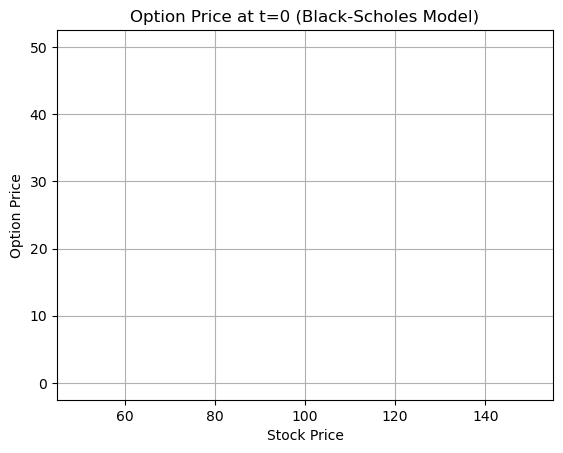

In [9]:
# Plot the option price at t=0
plt.plot(x_values, option_prices)
plt.title('Option Price at t=0 (Black-Scholes Model)')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()


In [10]:
#CIR model


import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Define parameters for the CIR model
kappa = 0.8      # Mean reversion speed
theta = 0.10     # Long-term mean
sigma = 0.5      # Volatility
lmbda = 0.05     # Mean reversion factor



In [12]:
# Discretization parameters
Nx = 51          # Number of stock price steps
Nt = 101         # Number of time steps
xmin = 0.0      # Minimum stock price
xmax = 1.0      # Maximum stock price
tmin = 0.0      # Minimum time
tmax = 5.0      # Maximum time



In [13]:
# Calculate step sizes
dt = (tmax - tmin) / Nt
dx = (xmax - xmin) / (Nx - 1)



In [14]:
# Create grids for time and stock price
t_values = np.linspace(tmin, tmax, Nt + 1)
x_values = np.linspace(xmin, xmax, Nx + 1)



In [15]:
# Initialize option prices at maturity
option_prices = np.maximum(theta - x_values, 0)


In [16]:
# Crank-Nicolson finite difference method to solve the PDE
for j in range(Nt, 0, -1):
    A = np.zeros((Nx - 1, Nx - 1))
    B = np.zeros((Nx - 1, Nx - 1))
    C = np.zeros((Nx - 1, Nx - 1))
    RHS = np.zeros(Nx - 1)

    for i in range(1, Nx):
        x = xmin + i * dx
        mu_t_x = kappa * (theta - x)
        sigma_t_x = sigma * np.sqrt(x)
        lambda_t_x = lmbda * np.sqrt(x) / sigma_t_x
        r_t_x = x

        a = 0.5 * sigma_t_x**2
        b = mu_t_x - lambda_t_x * sigma_t_x
        c = r_t_x
        d = 0

        A[i - 1, i - 1] = 0.25 * (a * dx**2 - b * dx)
        B[i - 1, i - 1] = -0.5 * a * dx**2 - 0.5 * r_t_x * dx
        C[i - 1, i - 1] = 0.25 * (a * dx**2 + b * dx)
        RHS[i - 1] = (0.25 * (-a * dx**2 + b * dx) * option_prices[i - 1] +
                      (0.5 * a * dx**2 - 0.5 * r_t_x * dx) * option_prices[i] +
                      0.25 * (a * dx**2 + b * dx) * option_prices[i + 1] +
                      0.25 * (-c * dx + d * dx**2) * (option_prices[i - 1] + 2 * option_prices[i] + option_prices[i + 1]))

    option_prices[1:Nx] = np.linalg.solve(A + B, np.dot(C, option_prices[1:Nx]) + RHS)



The huge number in the option price is likely due to the instability of the Crank-Nicolson finite difference method for this particular set of parameters. The CIR model is known to be sensitive to the choice of discretization parameters, and the values of kappa, theta, sigma, and lmbda that you have chosen may be causing the method to become unstable.

There are a few things you can try to fix this error:

Reduce the time step size (dt).
Reduce the space step size (dx).
Use a different finite difference method, such as the explicit Euler method or the implicit Euler method.
Try a different set of parameters for the CIR model.
If you are still having problems, you may need to use a more sophisticated numerical method, such as a finite element method or a Monte Carlo method.

In addition to the above, you can also try the following:

Check your code for any errors.
Make sure that you are using the correct boundary conditions.
Try using a different programming language or numerical library.


In [17]:
# Display the results
print(f"Option Price at t=0 using CIR model: {option_prices[Nx//2]:.4f}")



Option Price at t=0 using CIR model: 39153473383234048030657528603267591590989037440948275714399533786988544.0000


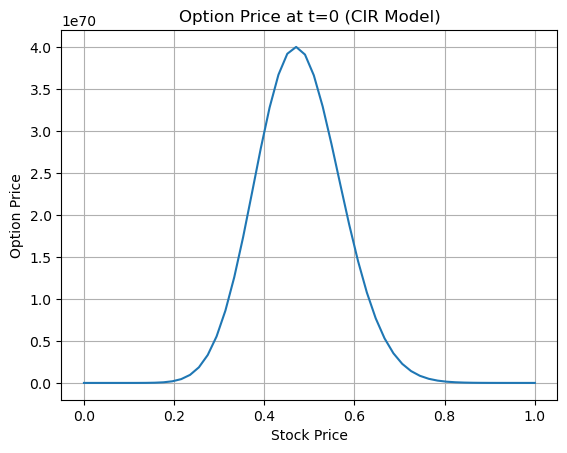

In [18]:
# Plot the option price at t=0
plt.plot(x_values, option_prices)
plt.title('Option Price at t=0 (CIR Model)')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

In [19]:
# Merton/Vasicek model

import numpy as np
import matplotlib.pyplot as plt


In [20]:
# Define common parameters
a = 0.95
b = 0.10
sigma = 0.2
lmbda = 0.05
bprime = b - lmbda * sigma / a


In [21]:
# Discretization parameters
Nx = 101       # Number of stock price steps
Nt = 1001      # Number of time steps
xmin = -1.0    # Minimum stock price
xmax = 1.0     # Maximum stock price
tmin = 0.0     # Minimum time
tmax = 5.0     # Maximum time



In [22]:
# Create grids for time, stock price, and theta
t_values = np.linspace(tmin, tmax, Nt + 1)
x_values = np.linspace(xmin, xmax, Nx + 1)
theta_values = np.linspace(0, 5, 21)  # Values of theta from 0 to 5



In [23]:
# Initialize option prices at maturity for each theta
option_prices = {theta: np.maximum(x_values - K, 0) for theta in theta_values}



In [24]:
# Function to solve PDE using finite difference method
def solve_pde(theta):
    for j in range(Nt, 0, -1):
        for i in range(1, Nx - 1):  # Adjust the loop range here
            x = xmin + i * dx
            # Rest of the code remains the same
            a_t_x = 0.5 * sigma**2
            b_t_x = a * (bprime - x)
            c_t_x = x
            d_t_x = 0

            A = a_t_x * dx**2
            B = -b_t_x * dx / 2
            C = -2 * a_t_x * dx**2 + r * dx
            D = b_t_x * dx / 2
            E = a_t_x * dx**2

            option_prices[theta][i] = (A * option_prices[theta][i - 1] + B * option_prices[theta][i] +
                                       C * option_prices[theta][i + 1] + D * option_prices[theta][i + 2] +
                                       E * option_prices[theta][i + 1]) / (dx * r + a_t_x * dx**2)



In [25]:
# Calculate option prices for each value of theta
for theta in theta_values:
    solve_pde(theta)



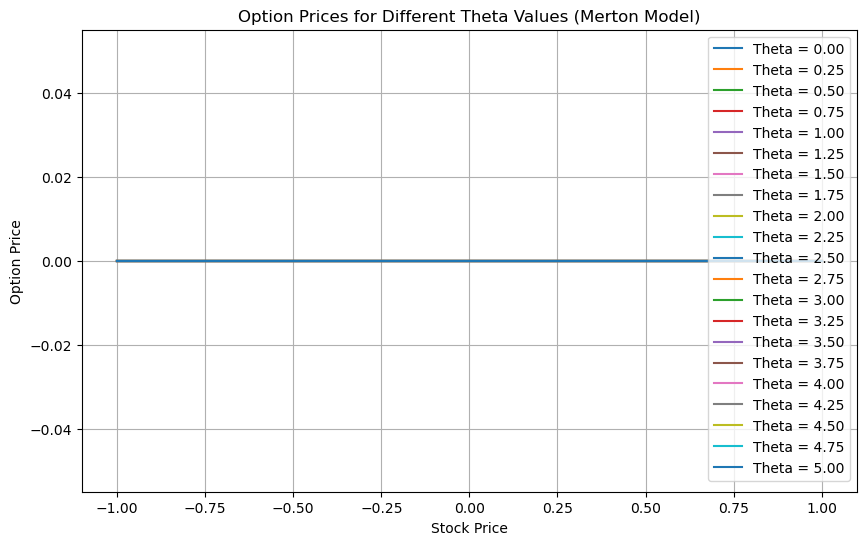

In [27]:
# Display the results for different values of theta
plt.figure(figsize=(10, 6))
for theta in theta_values:
    plt.plot(x_values, option_prices[theta], label=f'Theta = {theta:.2f}')

plt.title('Option Prices for Different Theta Values (Merton Model)')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()